In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

QUESTION ONE

In [2]:
h_disease=pd.read_csv('heart.csv')
h_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


QUESTION 2

In [3]:
# Q2
numerical_continuous=[]
numerical_discrete=[]
for column in h_disease.columns:
        if h_disease[column].nunique()>=10:
            numerical_continuous.append(column)
        else:
                numerical_discrete.append(column)
print(numerical_continuous)
print(numerical_discrete)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


QUESTION 3

<AxesSubplot:>

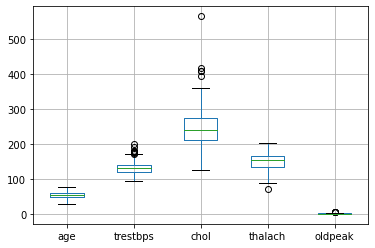

In [4]:
h_disease[numerical_continuous].boxplot()

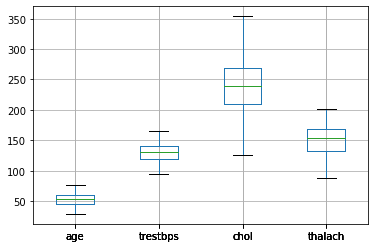

In [18]:
def remove_Outlier(column):
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IRQ=Q3-Q1
    Lower_lim=Q1-1.5*IRQ
    Upper_lim=Q3+1.5*IRQ
    return Lower_lim, Upper_lim

for column in numerical_continuous:
    Lower_lim,Upper_lim=remove_Outlier(h_disease[column])
    h_disease=h_disease.loc[(h_disease[column]> Lower_lim)&(h_disease[column]< Upper_lim)]
    h_disease[numerical_continuous].boxplot()

QUESTION 4

In [42]:
h_disease['age']=h_disease['age'].astype('float')
h_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         303 non-null    float64 
 1   sex         303 non-null    int64   
 2   cp          303 non-null    int64   
 3   trestbps    303 non-null    int64   
 4   chol        303 non-null    int64   
 5   fbs         303 non-null    int64   
 6   restecg     303 non-null    int64   
 7   thalach     303 non-null    int64   
 8   exang       303 non-null    int64   
 9   oldpeak     303 non-null    float64 
 10  slope       303 non-null    int64   
 11  ca          303 non-null    int64   
 12  thal        303 non-null    int64   
 13  target      303 non-null    int64   
 14  age_b       303 non-null    category
 15  trestbps_b  303 non-null    category
 16  chol_b      303 non-null    category
 17  thalach_b   303 non-null    category
dtypes: category(4), float64(2), int64(12)
memory usage

In [40]:
# Q4
# numerical_continuous.remove('oldpeak')
# numerical_continuous

h_disease['age_b']=pd.qcut(h_disease.age, q=[0,.25, .50, .75, 1])
h_disease['trestbps_b']=pd.qcut(h_disease.trestbps, q=[0, .25, .50, .75, 1])
h_disease['chol_b']=pd.qcut(h_disease.chol, q=[0, .25, .50, .75, 1])
h_disease['thalach_b']=pd.qcut(h_disease.thalach, q=[0, .25, .50, .75, 1])
h_disease.drop(columns=['age', 'trestbps', 'chol', 'thalach','oldpeak'])
h_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_b,trestbps_b,chol_b,thalach_b
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(61.0, 77.0]","(140.0, 200.0]","(211.0, 240.0]","(133.5, 153.0]"
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(28.999, 47.5]","(120.0, 130.0]","(240.0, 274.5]","(166.0, 202.0]"
2,41.0,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(28.999, 47.5]","(120.0, 130.0]","(125.999, 211.0]","(166.0, 202.0]"
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(55.0, 61.0]","(93.999, 120.0]","(211.0, 240.0]","(166.0, 202.0]"
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(55.0, 61.0]","(93.999, 120.0]","(274.5, 564.0]","(153.0, 166.0]"


In [5]:
from sklearn.model_selection import train_test_split
x= h_disease[numerical_continuous]
y=h_disease['target']
x_train, x_test,y_train, y_test=train_test_split(x, y, train_size=0.7,random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((212, 5), (91, 5), (212,), (91,))

QUESTION 6

In [45]:
from sklearn import linear_model
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
scaled = pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
scaled.head()

,age,trestbps,chol,thalach,oldpeak
0,-0.301887,-0.25,-0.429752,-0.991736,0.3750
1,-0.830189,-0.90,0.842975,-0.066116,-0.5000
2,-0.075472,-0.30,0.446281,-1.520661,0.8750
3,0.377358,1.00,0.016529,0.528926,0.0625
4,0.226415,1.00,0.512397,-1.454545,0.0000


QUESTION 8

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model

classifiers={'LogisticRegression':LogisticRegression(),
            'KNeighborsClassifier':KNeighborsClassifier(),
            'SVC':SVC(),
            'RandomForestClassifier':RandomForestClassifier(),
            'DecisionTreeClassifier':DecisionTreeClassifier(),
            'GradientBoostingRegressor':GradientBoostingRegressor()
           }
train_scores=[]
test_scores=[]
 
for key, classifier in classifiers.items():
    classifier.fit(x_train,y_train)
    train_score=round(classifier.score(x,y),2)
    train_scores=(train_score)
    test_score=round(classifier.score(x,y),2)
    test_scores=(test_score)
    print(train_scores)
    print(test_scores)

0.73
0.73
0.72
0.72
0.7
0.7
0.91
0.91
0.88
0.88
0.58
0.58


QUESTION 9

<AxesSubplot:>

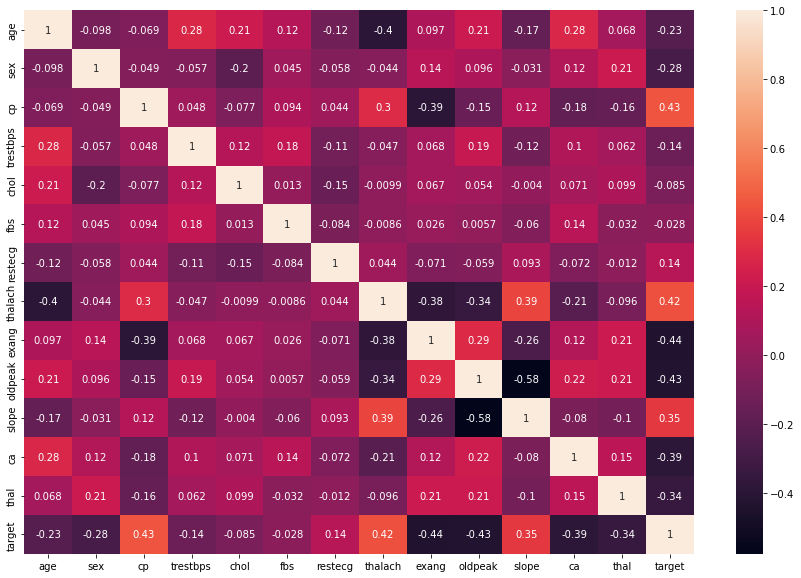

In [58]:
plt.figure(figsize=(15,10))
import matplotlib.pyplot as plt
import seaborn as sns
cor=h_disease.corr()
sns.heatmap(cor,annot=True)